In [2]:
import scipy.io
import numpy as np
import scanpy as sc
adata_mel=sc.read("adata_2_pal.h5ad")
adata_mel_raw=sc.read("adata_raw.h5ad")

In [3]:
adata_all=sc.read("adata_all.h5ad")

In [1]:
import scFates as scf
scf.set_figure_pubready()

In [10]:
adata_all.obs["sel"]=adata_all.obs_names.isin(adata_mel.obs_names).astype(str)

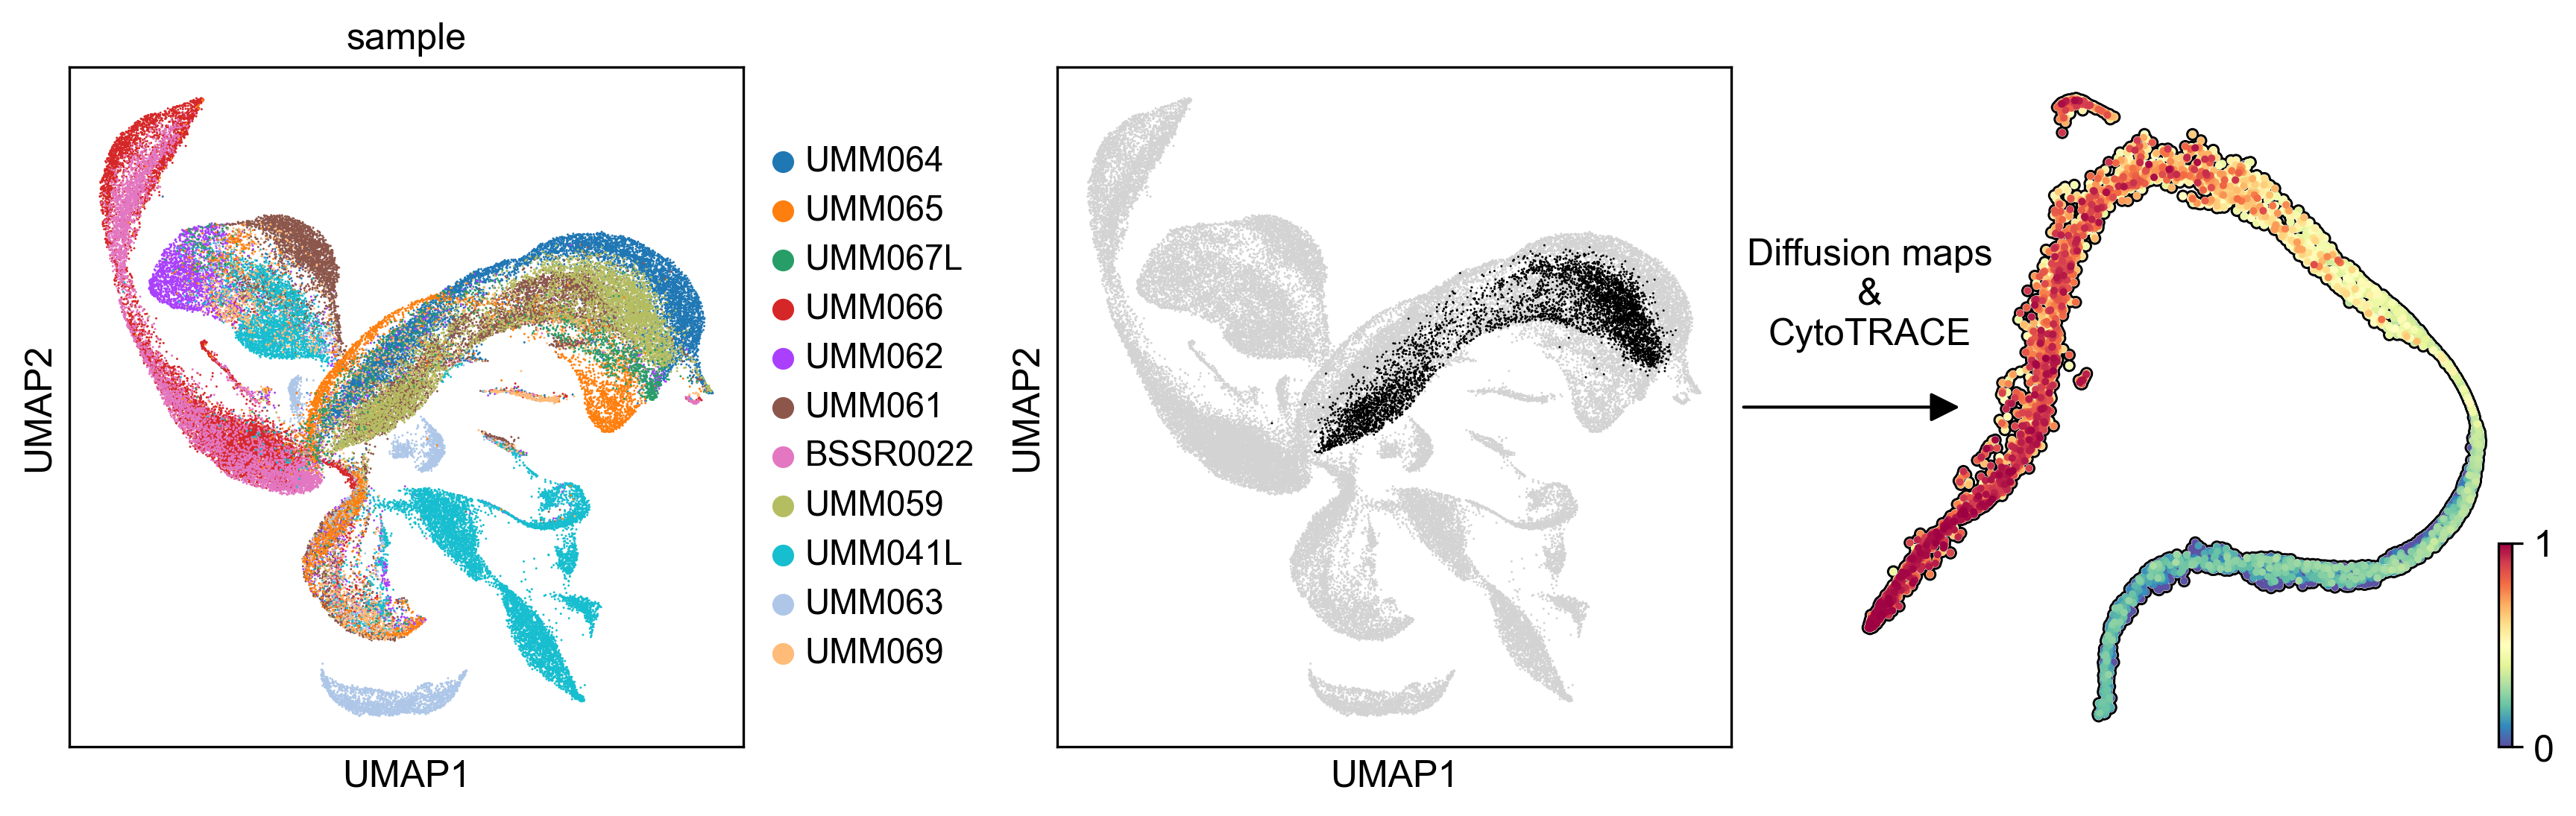

In [76]:
sc.set_figure_params(dpi=150,fontsize=12)
from matplotlib.patches import ConnectionPatch
import scvelo as scv
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,4,figsize=(14,4),gridspec_kw=dict(width_ratios=[1,.15,1,1]))

sc.pl.umap(adata_all,color="sample",show=False,ax=axs[0])
sc.pl.umap(adata_all,color="sel",title="",groups=["True"],palette=["k"],legend_loc="none",show=False,ax=axs[2])
scv.pl.tsne(adata_mel, color="CytoTRACE",cmap='Spectral_r',title="",add_outline=True,show=False,ax=axs[3])
axs[3].grid(False)

con = ConnectionPatch((1,.5), (.2,.5), 
                      coordsA=axs[2].transAxes, 
                      coordsB=axs[3].transAxes,
                      arrowstyle="-|>", shrinkA=4, shrinkB=4,
                      mutation_scale=20, fc="k")
axs[2].add_artist(con)
fig.text(.755,.6,"Diffusion maps\n&\nCytoTRACE",ha="center",size=12)
axs[1].axis("off")
plt.savefig("figures/suppfig.pdf",dpi=300)


In [2]:
adata_mel=adata_mel_raw[adata_mel.obs_names]

In [3]:
adata_glia=sc.read("../../SS2/data/adata_assigned.h5ad")
adata_raw=sc.read("../../SS2/data/adata_glia_raw.h5ad")
adata_raw=adata_raw[adata_glia.obs_names]

In [7]:
import pandas as pd
ass_cols=pd.Series(adata_glia.uns["assignments_colors"],index=adata_glia.obs.assignments.cat.categories)

adata_glia.obs.assignments=adata_glia.obs.assignments.astype(str)
adata_glia.obs.loc[adata_glia.obs.Hub_leiden=="True","assignments"]="Hub"
adata_glia.obs.assignments=adata_glia.obs.assignments.astype("category")

ass_cols["Hub"]="lightgrey"

ass_cols["none"]="grey"

In [8]:
adata_glia.obs.assignments.cat.categories[:-1].tolist()

['BCC',
 'ChC',
 'Gut_glia',
 'Gut_neuron',
 'Hub',
 'Melanocytes',
 'Mesenchyme',
 'NCC',
 'SC',
 'SatGlia',
 'Sensory',
 'Symp',
 'enFib']

In [9]:
adata_glia.obs.assignments

SS2_16_249-2:A1_unique.bam        Hub
SS2_16_249-2:A2_unique.bam        Hub
SS2_16_249-2:A6_unique.bam        Hub
SS2_16_249-2:A3_unique.bam        Hub
SS2_16_249-2:A5_unique.bam        Hub
                               ...   
SS2_20_087:N14_unique.bam         Hub
SS2_20_087:N18_unique.bam         Hub
SS2_20_087:O2_unique.bam      Sensory
SS2_20_087:O20_unique.bam         ChC
SS2_20_087:O18_unique.bam         ChC
Name: assignments, Length: 8842, dtype: category
Categories (14, object): ['BCC', 'ChC', 'Gut_glia', 'Gut_neuron', ..., 'Sensory', 'Symp', 'enFib', 'none']

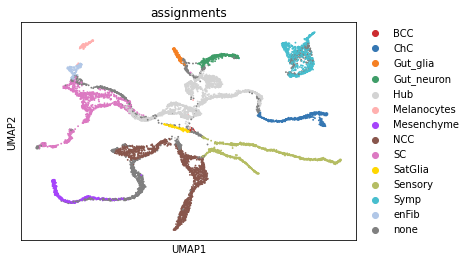

In [10]:
sc.pl.umap(adata_glia,color="assignments",palette=[ass_cols[a] for a in adata_glia.obs.assignments.cat.categories])

In [11]:
adata_raw.obs["assignments"]=adata_glia.obs.assignments

Trying to set attribute `.obs` of view, copying.


In [12]:
barcodes=adata_mel.obs_names.tolist()
features=adata_mel_raw.var_names.tolist()

In [13]:
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython

In [14]:
%%R -i barcodes -i features -i adata_raw
library(Seurat)
adata_glia <- as.Seurat(adata_raw,counts="X",data = "X")
mtx=as(readMM("traj_2_matrix.mtx"), "dgCMatrix")
rownames(mtx)=unlist(barcodes)
colnames(mtx)=stringr::str_to_title(unlist(features))
p2_mel=pagoda2::basicP2proc(t(mtx),n.cores = 20,n.odgenes = NULL,get.largevis=FALSE,get.tsne = FALSE, make.geneknn=FALSE)
p2_glia=pagoda2::basicP2proc(adata_glia@assays$RNA@counts,n.cores = 20,n.odgenes = NULL,get.largevis=FALSE,get.tsne = FALSE, make.geneknn=FALSE)

R[write to console]: Attaching SeuratObject

R[write to console]: 
Attaching package: ‘Seurat’


R[write to console]: The following object is masked from ‘package:SummarizedExperiment’:

    Assays


R[write to console]: 5096 cells, 27892 genes; normalizing ... 

R[write to console]: Using plain model 

R[write to console]: Winsorizing ... 

R[write to console]: log scale ... 

R[write to console]: done.


R[write to console]: calculating variance fit ...

R[write to console]:  using gam 

R[write to console]: 2630 overdispersed genes ... 2630

R[write to console]: persisting ... 

R[write to console]: done.

R[write to console]: running PCA using 2630 OD genes .

R[write to console]: .

R[write to console]: .

R[write to console]: .

R[write to console]:  done




creating space of type angular done
adding data ... done
building index ... done
querying ... done


R[write to console]: 8842 cells, 24489 genes; normalizing ... 

R[write to console]: Using plain model 

R[write to console]: Winsorizing ... 

R[write to console]: log scale ... 

R[write to console]: done.


R[write to console]: calculating variance fit ...

R[write to console]:  using gam 

R[write to console]: 6186 overdispersed genes ... 6186

R[write to console]: persisting ... 

R[write to console]: done.

R[write to console]: running PCA using 6186 OD genes .

R[write to console]: .

R[write to console]: .

R[write to console]: .

R[write to console]:  done




creating space of type angular done
adding data ... done
building index ... done
querying ... done


In [15]:
%%R -o graph_conn -o members -o assignments_proj -o proj_names
library(conos)
panel<-list(p2_glia,p2_mel)
names(panel)<-c("glia","mel")
con <- Conos$new(panel, n.cores=1)
con$buildGraph(k=15, k.self=5, space='PCA',ncomps=20)

graph_conn <- igraph::as_adjacency_matrix(con$graph, attr="weight")
members = colnames(graph_conn)

milestones=adata_glia@meta.data$assignments
names(milestones)=colnames(adata_glia)
assignments_proj <- con$propagateLabels(labels = milestones, verbose=FALSE)
proj_names <- names(assignments_proj$labels)

R[write to console]: Loading required package: igraph

R[write to console]: 
Attaching package: ‘igraph’


R[write to console]: The following object is masked from ‘package:GenomicRanges’:

    union


R[write to console]: The following object is masked from ‘package:IRanges’:

    union


R[write to console]: The following object is masked from ‘package:S4Vectors’:

    union


R[write to console]: The following objects are masked from ‘package:BiocGenerics’:

    normalize, path, union


R[write to console]: The following objects are masked from ‘package:stats’:

    decompose, spectrum


R[write to console]: The following object is masked from ‘package:base’:

    union


R[write to console]: found 0 out of 1 cached PCA space pairs ... 

R[write to console]: running 1 additional PCA space pairs 



.

R[write to console]:  done

R[write to console]: inter-sample links using mNN 



.

R[write to console]:  done

R[write to console]: local pairs 

R[write to console]: .

R[write to console]: .

R[write to console]:  done


R[write to console]: building graph .



.

R[write to console]: done



In [16]:
import pandas as pd
members=pd.Series(members)

In [17]:
ss2_members=members[members.str.contains("SS2")]
tenx_members=members[~members.str.contains("SS2")]
graph_conn=graph_conn[tenx_members.index,:][:,ss2_members.index]
ss2_members.reset_index(drop=True,inplace=True)
tenx_members.reset_index(drop=True,inplace=True)


In [18]:
assign_proj=pd.Series(assignments_proj.rx("labels")[0],index=proj_names)

In [19]:
adata_sub=sc.read("adata_2_pal.h5ad")

In [20]:
adata_sub.obs["assign_proj"]=assign_proj.loc[adata_sub.obs_names].values

In [21]:
adata_sub.obs["assign_proj"]=adata_sub.obs["assign_proj"].astype('category')

In [22]:
adata_sub.obs.assign_proj

AAACCTGAGATGTCGG-6       Gut_glia
AAACCTGCAAGGCTCC-6            ChC
AAACCTGCAAGTCTAC-6             SC
AAACCTGCACCGTTGG-6            Hub
AAACCTGCACGAAACG-6    Melanocytes
                         ...     
TTTGTCAGTGGCAAAC-6           none
TTTGTCAGTGGTGTAG-6       Gut_glia
TTTGTCATCCTTGGTC-6             SC
TTTGTCATCGCCAAAT-6        Sensory
TTTGTCATCGTACCGG-6             SC
Name: assign_proj, Length: 5096, dtype: category
Categories (13, object): ['ChC', 'Gut_glia', 'Gut_neuron', 'Hub', ..., 'Sensory', 'Symp', 'enFib', 'none']

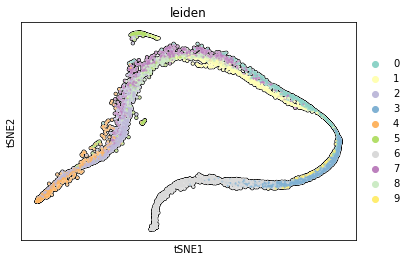

In [23]:
sc.pl.tsne(adata_sub,color="leiden",palette='Set3',add_outline=True,save="_Melanoma_leiden.png")

In [24]:
sc.set_figure_params(dpi_save=600)

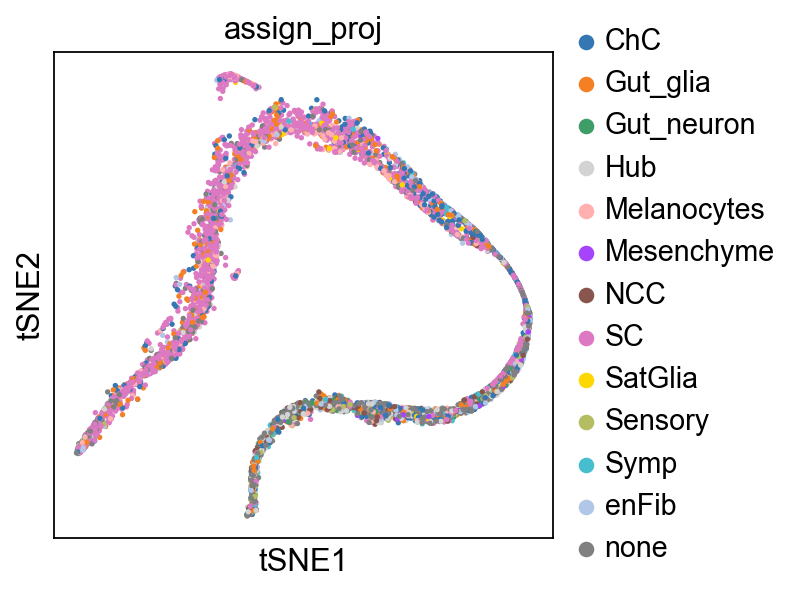

In [30]:
sc.pl.tsne(adata_sub,color="assign_proj")

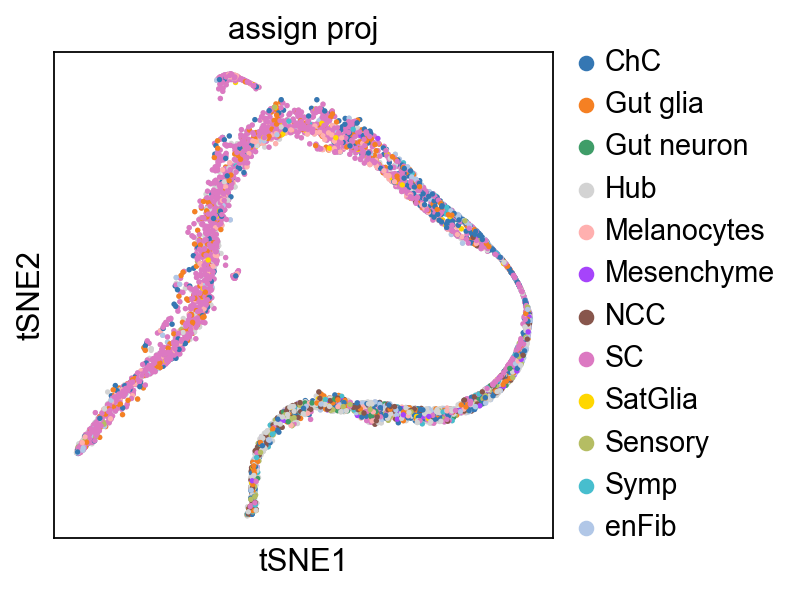

In [38]:
import scvelo as scv
ax=scv.pl.tsne(adata_sub,color="assign_proj",groups=adata_sub.obs.assign_proj.cat.categories[:-1].tolist(),
            legend_loc="right",frameon=True,show=False)

ax.grid(False)

In [39]:
umap=np.asarray(adata_glia[ss2_members].obsm["X_umap"])
proj_umap=list(map(lambda i: [np.nansum((graph_conn[i,:].A*umap[:,0])[0]/np.sum(graph_conn[i,:].A[0])),
                              np.nansum((graph_conn[i,:].A*umap[:,1])[0]/np.sum(graph_conn[i,:].A[0]))],
                   range(graph_conn.shape[0])))

adata_sub.obsm["X_umap"]=pd.DataFrame(proj_umap,index=tenx_members).loc[adata_sub.obs_names].values

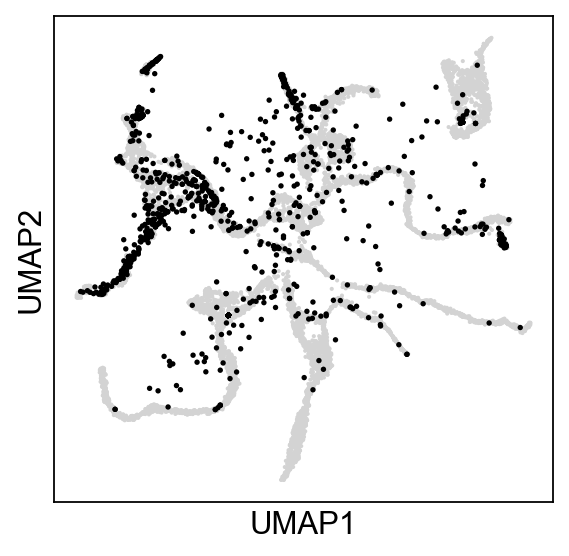

In [40]:
ax=sc.pl.umap(adata_glia,show=False)
sc.pl.scatter(adata_sub,basis="umap",color="k",ax=ax)

In [44]:
adata_ss2=adata_glia

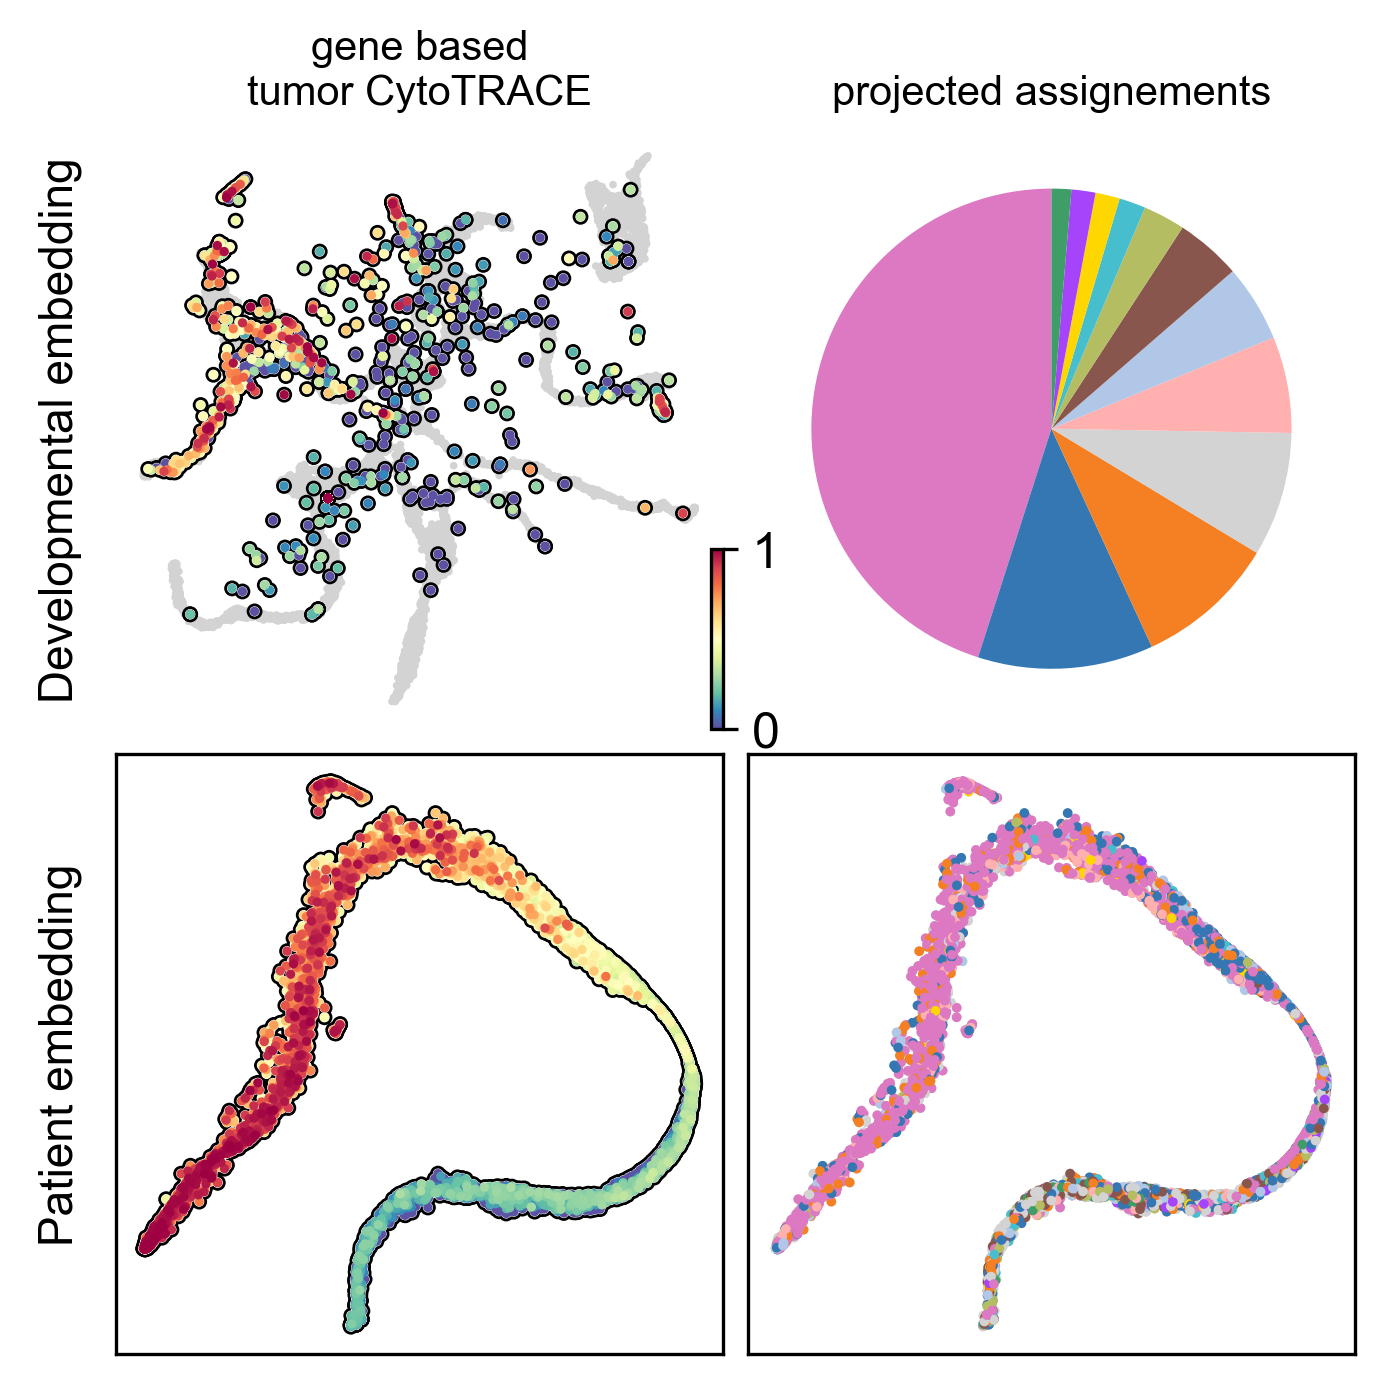

In [52]:



fig = plt.figure(constrained_layout=True,figsize=(4.5,4.5))
widths = [2, 3, 1.5]
heights = [1, 3, 2]
spec = fig.add_gridspec(ncols=3, nrows=2, width_ratios=[1,10,10])

scv.set_figure_params(figsize=(5,5),dpi=150,frameon=False,fontsize=12,dpi_save=600)

ax = fig.add_subplot(spec[0, 1])

sc.pl.umap(adata_ss2,ax=ax,show=False,legend_loc=False)
scv.pl.scatter(adata_sub, c="CytoTRACE",ax=ax, cmap='Spectral_r',title="",
               show=False,zorder=99,size=20,add_outline=True)

ax.set_title("gene based\ntumor CytoTRACE",loc='center',fontdict={'fontsize':10})



ax = fig.add_subplot(spec[1, 1])

scv.pl.scatter(adata_sub,basis="tsne", c="CytoTRACE",ax=ax, cmap='Spectral_r',title="",
               show=False,zorder=99,size=20,colorbar=False,add_outline=True,frameon=True)


ax.set_xlabel("")
ax.set_ylabel("")



props=adata_sub.obs.assign_proj[adata_sub.obs.assign_proj!="none"].value_counts()
props=props[props!=0]
labels = props.index.to_list()
cols=ass_cols[labels]
sizes = props.to_list()


ax = fig.add_subplot(spec[0, 2])

ax.pie(sizes,colors=cols,
        shadow=False, startangle=90,radius=1)
ax.axis()
ax.set_title("projected assignements",loc='center',fontdict={'fontsize':10})


ax = fig.add_subplot(spec[1, 2])

scv.pl.tsne(adata_sub,color="assign_proj",groups=adata_sub.obs.assign_proj.cat.categories[:-1].tolist(),
            legend_loc="none",frameon=True,show=False,title="",ax=ax)

ax.grid(False)

ax.set_xlabel("")
ax.set_ylabel("")
#plt.savefig("figures/"+p+".pdf",bbox_inches='tight')


ax = fig.add_subplot(spec[0, 0])

ax.text(0.5, 0.5, 'Developmental embedding',fontsize=11,
        horizontalalignment='center',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)
ax.axis('off')

ax = fig.add_subplot(spec[1, 0])

ax.text(0.5, 0.5, 'Patient embedding',fontsize=11,
        horizontalalignment='center',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)
ax.axis('off')
plt.savefig("figures/overview.pdf",bbox_inches='tight')